# Chapter 2

## Question 9

Here we investigate the `Auto` dataset, stored in `Auto.csv`

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, read the data in and examine it. Make sure missing values are removed.

In [60]:
auto = pd.read_csv("Auto.csv")
auto.dropna(inplace=True)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Which of the predictors are quantitative, and which are qualitative?

In [61]:
print(auto.dtypes) # implies horsepower and name are qualitative - why is horsepower not a float?

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


In [67]:
# We have non-integer values in "horsepower" - drop these rows
auto.horsepower = pd.to_numeric(auto.horsepower, errors='coerce')
auto.dropna(inplace=True)


In [69]:
#What is the "origin" field?
auto.origin.value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

Seems like "origin" is a categorical variable, and "name" is qualitative.

What is the range, mean, and std. dev or each variable? We can get all this with df.describe():

In [70]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Remove the 10th-85th observations: What is the range, mean and std. dev of the subset?

In [73]:
auto_subset = auto.drop(auto.index[10:86])
auto_subset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,316.000000,316.000000,316.000000,316.000000,316.00000,316.000000,316.000000,316.000000
mean,24.407595,5.373418,187.512658,100.848101,2936.53481,15.717405,77.136076,1.601266
std,7.863285,1.654179,100.114616,35.954147,811.87445,2.713876,3.123464,0.819910
min,11.000000,3.000000,68.000000,46.000000,1649.00000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.250000,75.000000,2213.75000,14.000000,75.000000,1.000000
50%,23.950000,4.000000,145.500000,90.000000,2792.50000,15.500000,77.000000,1.000000
75%,30.550000,6.000000,250.000000,115.000000,3508.00000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.00000,24.800000,82.000000,3.000000


Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

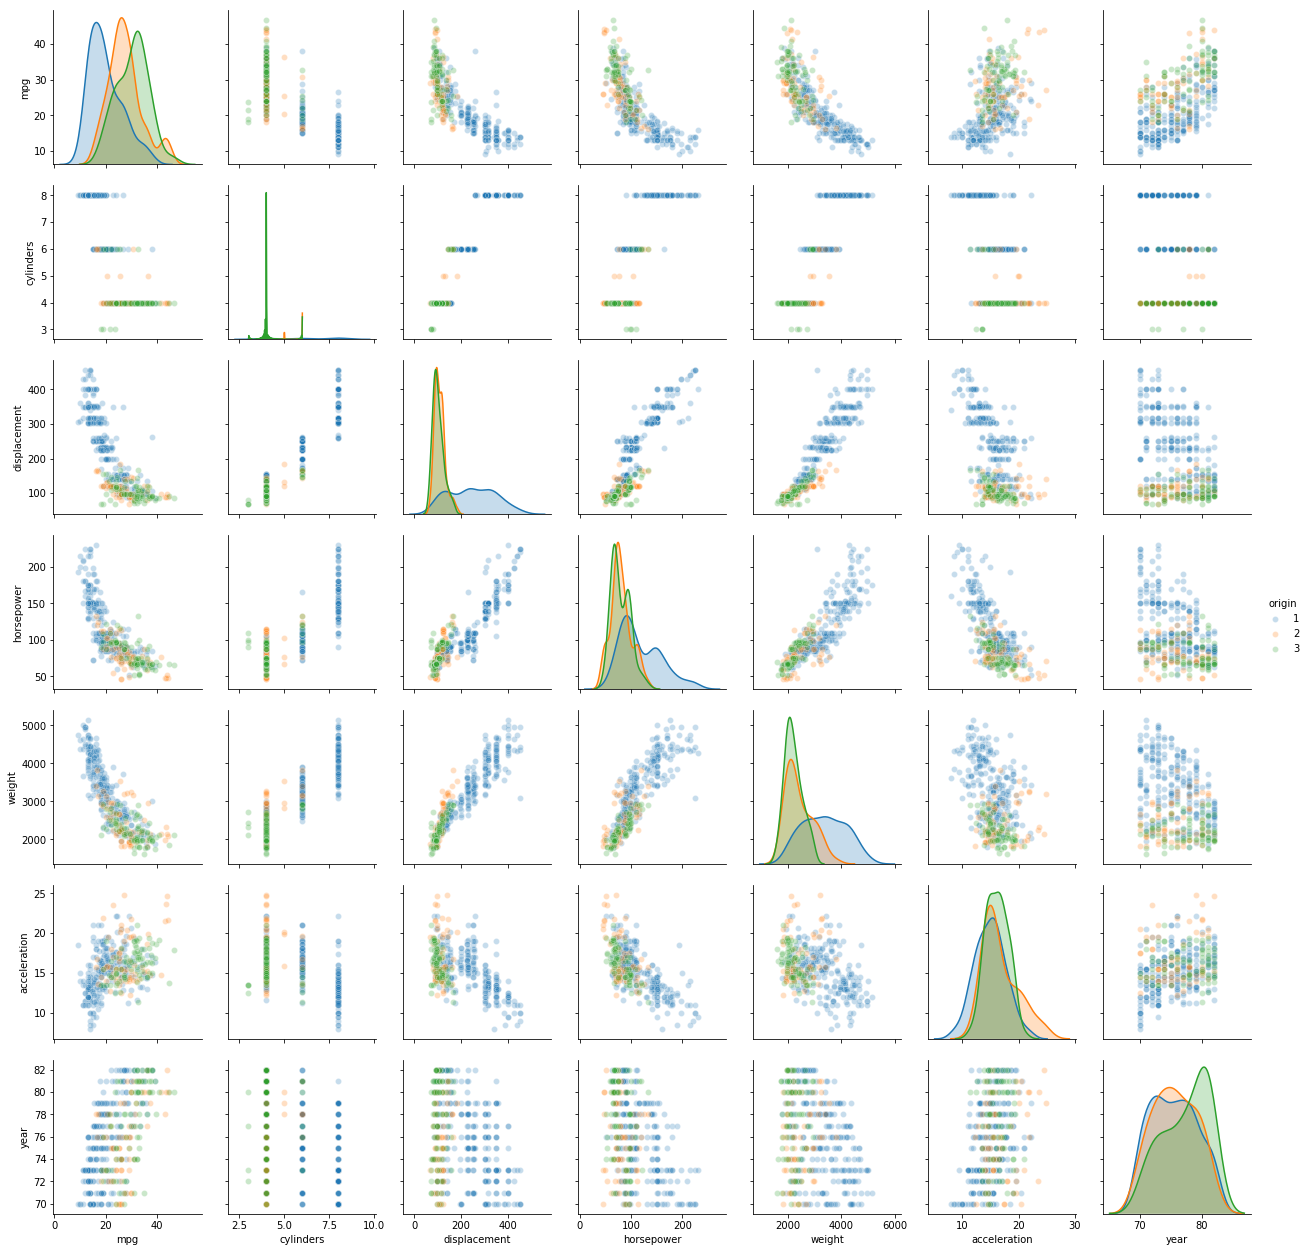

In [82]:
# Pairplot silently ignores the "Private" field as it is a categorical variable. We could cast it to a bool
# but let's instead use it to colour the scatterplots
sns.pairplot(auto[auto.columns[:-1]], hue="origin" , vars=auto.columns[:-2], plot_kws=dict(alpha=0.25))


There are lots of correlations in this dataset! 
- We see weight decreasing with year, mpg increasing with year,
- Weight decreases with mpg, but increases with displacement and horsepower
- Horsepower decreases with mpg, increases with the number of cylinders, increases with displacement, decreases with acceleration (slightly odd)
- Displacement decreases with mpg, increases with the number of cylinders


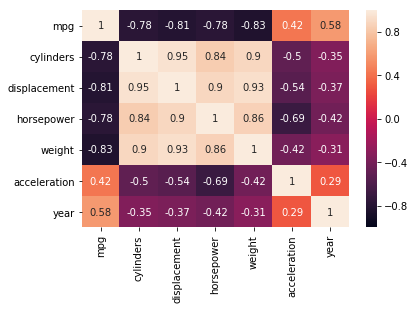

In [84]:
# get the correlation matrix
corr = auto[auto.columns[:-2]].corr()
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values, vmin=-1, vmax=+1, annot=True)

The above implies that we could predict mpg well using the other variables - displacement, horsepower and weight all correlate well implying that regression would give reasonable answers